## **Banana Ripeness Detection**

### **Import Libraries**
Library yang diperlukan untuk sistem deteksi kematangan pisang:
- **OpenCV (cv2)**: Untuk pemrosesan gambar dan computer vision
- **NumPy**: Untuk operasi array dan matriks
- **scikit-learn (KMeans)**: Untuk clustering warna
- **Matplotlib**: Untuk visualisasi hasil

Setiap library memiliki peran penting:
- cv2: Edge detection, color conversion, image processing
- NumPy: Matrix operations, array manipulations
- KMeans: Color clustering dan analisis
- Matplotlib: Plotting dan visualisasi hasil analisis

In [1]:
# Import library yang diperlukan
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import requests

print("Libraries imported successfully!")

Libraries imported successfully!


## **Inisialisasi Class BananaRipenessDetector**
### Praktikum 1: Basic Python - OOP Concepts

Class ini mengimplementasikan sistem deteksi kematangan pisang dengan parameter warna dalam ruang HSV:

**Range Warna untuk Klasifikasi:**
1. **Pisang Mentah (Unripe)**:
   - Hue: 25-35 (hijau kekuningan)
   - Saturation: 50-255
   - Value: 50-255

2. **Pisang Matang (Ripe)**:
   - Hue: 20-30 (kuning)
   - Saturation: 100-255
   - Value: 100-255

3. **Pisang Terlalu Matang (Overripe)**:
   - Hue: 0-20 (coklat)
   - Saturation: 50-255
   - Value: 20-255

Range warna ini dikalibrasi berdasarkan observasi karakteristik warna pisang pada berbagai tingkat kematangan.

In [2]:
class BananaRipenessDetector:
    """
    Kelas untuk mendeteksi tingkat kematangan pisang menggunakan teknik computer vision.
    Mengimplementasikan konsep dari Praktikum 1-6
    """
    def __init__(self):
        """
        Inisialisasi range warna untuk berbagai tingkat kematangan pisang dalam ruang warna HSV
        Bagian dari Praktikum 1: Basic Python - Pengenalan Class dan Atribut
        """
        # Range warna untuk pisang mentah (hijau kekuningan)
        self.unripe_range = {
            'lower': np.array([25, 50, 50]),
            'upper': np.array([35, 255, 255])
        }
        # Range warna untuk pisang matang (kuning)
        self.ripe_range = {
            'lower': np.array([20, 100, 100]),
            'upper': np.array([30, 255, 255])
        }
        # Range warna untuk pisang terlalu matang (coklat)
        self.overripe_range = {
            'lower': np.array([0, 50, 20]),
            'upper': np.array([20, 255, 255])
        }
        self.current_image = None

# Buat instance dari class
detector = BananaRipenessDetector()
print("BananaRipenessDetector initialized successfully!")

BananaRipenessDetector initialized successfully!


## **Preprocessing Methods**
### Praktikum 1 & 2: Basic Python dan Filtering

Implementasi metode preprocessing untuk meningkatkan kualitas gambar:

1. **Resize Image**:
   - Standarisasi ukuran (400x400)
   - Memastikan konsistensi analisis

2. **Color Space Conversion**:
   - BGR ke LAB: Untuk analisis intensitas dan komponen warna
   - BGR ke HSV: Untuk segmentasi warna yang robust

3. **Image Enhancement**:
   - Gaussian Blur: Mengurangi noise
   - Sharpening: Meningkatkan detail menggunakan kernel konvolusi
   ```[-1,-1,-1],
      [-1, 9,-1],
      [-1,-1,-1]```

4. **Output**:
   - HSV image: Untuk analisis warna
   - LAB image: Untuk analisis intensitas

In [3]:
def preprocess_image(self, image):
    """
    Melakukan preprocessing pada gambar input.
    
    Praktikum 1 & 2:
    - Basic Python: Image reading dan manipulasi dasar
    - Filtering: Color transformation, image enhancement
    
    Parameters:
        image: Gambar input dalam format BGR
    
    Returns:
        tuple: (hsv_image, lab_image) - Gambar dalam ruang warna HSV dan LAB
    """
    # Resize gambar untuk konsistensi
    resized = cv2.resize(image, (400, 400))
    
    # Konversi ke LAB color space
    lab = cv2.cvtColor(resized, cv2.COLOR_BGR2LAB)
    
    # Aplikasikan Gaussian blur untuk mengurangi noise
    blurred = cv2.GaussianBlur(resized, (5, 5), 0)
    
    # Penajaman gambar menggunakan kernel
    kernel = np.array([[-1,-1,-1], 
                     [-1, 9,-1],
                     [-1,-1,-1]])
    sharpened = cv2.filter2D(blurred, -1, kernel)
    
    # Konversi ke HSV setelah enhancement
    hsv = cv2.cvtColor(sharpened, cv2.COLOR_BGR2HSV)
    
    return hsv, lab

# Tambahkan method ke class
BananaRipenessDetector.preprocess_image = preprocess_image
print("Preprocessing methods added successfully!")

Preprocessing methods added successfully!


## **Edge Detection Methods**
### Praktikum 3: Edge Detection

Implementasi deteksi tepi menggunakan multiple techniques:

1. **Grayscale Conversion**:
   - Mengubah gambar ke grayscale untuk analisis intensitas
   - Mengurangi kompleksitas komputasi

2. **Histogram Analysis**:
   - Menghitung distribusi intensitas piksel
   - Membantu dalam penentuan threshold

3. **Thresholding**:
   - Otsu's method untuk threshold optimal
   - Menghasilkan binary image untuk segmentasi

4. **Canny Edge Detection**:
   - Threshold: 100-200
   - Mendeteksi tepi dengan presisi tinggi
   - Hasil: Edge map untuk analisis bentuk pisang

In [4]:
def detect_edges(self, image):
    """
    Implementasi deteksi tepi pada gambar.
    
    Praktikum 3: Edge Detection
    - Konversi grayscale
    - Histogram calculation
    - Thresholding
    - Edge detection menggunakan Canny
    
    Parameters:
        image: Gambar input dalam format BGR
    
    Returns:
        tuple: (edges, binary) - Hasil deteksi tepi dan hasil thresholding
    """
    # Konversi ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Hitung histogram
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    
    # Aplikasikan thresholding menggunakan Otsu's method
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Deteksi tepi menggunakan Canny
    edges = cv2.Canny(gray, 100, 200)
    
    return edges, binary

# Tambahkan method ke class
BananaRipenessDetector.detect_edges = detect_edges
print("Edge detection methods added successfully!")

Edge detection methods added successfully!


## **Boundary Detection Methods**
### Praktikum 4: Boundary Detection Using Fourier Transform

Implementasi deteksi batas objek menggunakan dua pendekatan:

1. **Fourier Transform**:
   - Mengkonversi gambar ke domain frekuensi
   - Membantu analisis karakteristik spektral gambar
   - Berguna untuk deteksi pola repetitif pada kulit pisang

2. **Contour Detection**:
   - Menggunakan hasil Canny Edge Detection
   - RETR_EXTERNAL: Hanya mengambil kontur terluar
   - CHAIN_APPROX_SIMPLE: Mengoptimalkan representasi kontur

**Kegunaan:**
- Mendeteksi bentuk keseluruhan pisang
- Memisahkan objek pisang dari background
- Membantu analisis tekstur permukaan

In [5]:
def detect_boundaries(self, image):
    """
    Implementasi deteksi batas objek menggunakan Fourier Transform.
    
    Praktikum 4: Boundary Detection
    - Fourier transform untuk analisis frekuensi
    - Contour detection untuk menemukan batas objek
    
    Parameters:
        image: Gambar input dalam format BGR
        
    Returns:
        tuple: (contours, f_shift) - Kontur yang terdeteksi dan hasil Fourier transform
    """
    # Aplikasikan Fourier Transform
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f_transform = np.fft.fft2(gray)
    f_shift = np.fft.fftshift(f_transform)
    
    # Temukan kontur menggunakan Canny edge detection
    contours, _ = cv2.findContours(
        cv2.Canny(gray, 100, 200),
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE
    )
    
    return contours, f_shift

# Tambahkan method ke class
BananaRipenessDetector.detect_boundaries = detect_boundaries
print("Boundary detection methods added successfully!")

Boundary detection methods added successfully!


## **Feature Extraction Methods**
### Praktikum 5: Feature Extraction and Analysis

Implementasi dua metode utama ekstraksi fitur:

1. **SIFT (Scale-Invariant Feature Transform)**:
   - Deteksi keypoints yang invariant terhadap skala dan rotasi
   - Menghasilkan deskriptor fitur untuk analisis tekstur
   - Membantu identifikasi pola bintik pada pisang

2. **Color Clustering dengan K-means**:
   - n_clusters=3: Mengekstrak 3 warna dominan
   - Mengelompokkan piksel berdasarkan kesamaan warna
   - Membantu analisis distribusi warna pada pisang

**Aplikasi dalam Analisis Kematangan:**
- Tekstur: Mengidentifikasi bintik-bintik coklat/hitam
- Warna Dominan: Menentukan tingkat kematangan
- Deskriptor: Menganalisis pola permukaan pisang

In [6]:
def extract_features(self, image):
    """
    Ekstraksi fitur menggunakan SIFT dan analisis warna.
    
    Praktikum 5: Feature Extraction
    - SIFT keypoint detection
    - Color clustering menggunakan K-means
    
    Parameters:
        image: Gambar input dalam format BGR
        
    Returns:
        tuple: (keypoints, descriptors, dominant_colors) - Fitur SIFT dan warna dominan
    """
    # SIFT feature detection
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(
        cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),
        None
    )
    
    # Color clustering menggunakan K-means
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(pixels)
    dominant_colors = kmeans.cluster_centers_.astype(int)
    
    return keypoints, descriptors, dominant_colors

def extract_dominant_colors(self, image, n_colors=3):
    """
    Ekstrak warna dominan menggunakan K-means clustering.
    
    Parameters:
        image: Gambar input dalam format BGR
        n_colors: Jumlah warna dominan yang akan diekstrak
        
    Returns:
        array: Warna-warna dominan dalam format BGR
    """
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_
    return colors.astype(int)

# Tambahkan methods ke class
BananaRipenessDetector.extract_features = extract_features
BananaRipenessDetector.extract_dominant_colors = extract_dominant_colors
print("Feature extraction methods added successfully!")

Feature extraction methods added successfully!


## **Segmentation Methods**
### Praktikum 6: Advanced Segmentation Techniques

Implementasi tiga metode segmentasi utama:

1. **Watershed Segmentation**:
   - Menggunakan markers dari hasil edge detection
   - Memisahkan objek pisang dari background
   - Parameters:
     - markers: Label untuk region berbeda
     - edges: Boundary markers

2. **Color-based Masking**:
   - Menggunakan range HSV yang telah didefinisikan
   - Membuat mask untuk setiap tingkat kematangan
   - Menggunakan cv2.inRange untuk thresholding warna

3. **Percentage Calculation**:
   - Menghitung rasio piksel dalam setiap mask
   - Memberikan persentase untuk setiap tingkat kematangan
   - Formula: (white_pixels / total_pixels) * 100

**Output:**
- Binary mask untuk segmentasi
- Persentase area untuk setiap kategori kematangan

In [7]:
def segment_image(self, image, edges):
    """
    Segmentasi gambar menggunakan watershed algorithm.
    
    Praktikum 6: Segmentation
    - Watershed segmentation
    - Binary thresholding
    - Marker creation
    
    Parameters:
        image: Gambar input dalam format BGR
        edges: Hasil deteksi tepi
        
    Returns:
        array: Mask hasil segmentasi
    """
    # Buat markers untuk watershed
    markers = np.zeros(image.shape[0:2], dtype=np.int32)
    
    # Gunakan binary thresholding untuk initial markers
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Apply watershed
    markers[binary > 0] = 1
    markers[edges > 0] = 2
    cv2.watershed(image, markers)
    
    # Buat final mask
    mask = np.zeros_like(gray)
    mask[markers == 1] = 255
    
    return mask

def create_mask(self, hsv_image, lower_range, upper_range):
    """
    Buat mask berdasarkan range warna tertentu.
    
    Parameters:
        hsv_image: Gambar dalam format HSV
        lower_range: Batas bawah range warna
        upper_range: Batas atas range warna
        
    Returns:
        array: Mask binary
    """
    mask = cv2.inRange(hsv_image, lower_range, upper_range)
    return mask

def calculate_color_percentage(self, mask):
    """
    Hitung persentase piksel dalam mask.
    
    Parameters:
        mask: Mask binary
        
    Returns:
        float: Persentase area yang terdeteksi
    """
    total_pixels = mask.shape[0] * mask.shape[1]
    white_pixels = cv2.countNonZero(mask)
    return (white_pixels / total_pixels) * 100

# Tambahkan methods ke class
BananaRipenessDetector.segment_image = segment_image
BananaRipenessDetector.create_mask = create_mask
BananaRipenessDetector.calculate_color_percentage = calculate_color_percentage
print("Segmentation methods added successfully!")

Segmentation methods added successfully!


## **Main Detection Method**

## Integrasi Metode Deteksi Kematangan Pisang

Method utama yang mengintegrasikan multiple analisis untuk deteksi kematangan pisang secara komprehensif. Menggunakan semua materi dari Praktikum 1 - 6

## 1. Preprocessing dan Input Validation

### Deskripsi
Method ini melakukan validasi input, apakah sumber gambar berasal dari url atau folder lokal

### Implementation
```python
# Cek apakah input adalah URL
    if image_path.startswith(('http://', 'https://')):
        try:
            headers = {
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
            }
            response = requests.get(image_path, headers=headers, timeout=10)
            response.raise_for_status()
            
            image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
            image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
            
            if image is None:
                raise ValueError("Tidak dapat membaca gambar dari URL")
                
        except Exception as e:
            raise ValueError(f"Error mengunduh gambar: {str(e)}")
    else:
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError("Tidak dapat membaca file gambar")

    # Simpan gambar ke instance variable
    self.current_image = image

    # Preprocessing (Praktikum 1 & 2)
    hsv_image, lab_image = self.preprocess_image(image)
```

### Komponen:
- Membaca source dari path yang diberikan
- Memvalidasi keberadaan dan validitas gambar
- Melakukan preprocessing untuk standarisasi gambar
- Mengkonversi ke ruang warna HSV dan LAB

## 2. Multi-Factor Analysis

### 2.1 Analisis Warna (40% bobot)

#### Deskripsi
Menganalisis distribusi warna pada gambar menggunakan ruang warna HSV.

#### Implementation
```python
# Membuat mask untuk setiap kategori kematangan
unripe_mask = self.create_mask(hsv_image, 
                              self.unripe_range['lower'], 
                              self.unripe_range['upper'])
ripe_mask = self.create_mask(hsv_image, 
                            self.ripe_range['lower'], 
                            self.ripe_range['upper'])
overripe_mask = self.create_mask(hsv_image, 
                                self.overripe_range['lower'], 
                                self.overripe_range['upper'])

color_percentages = {
    'Mentah': self.calculate_color_percentage(unripe_mask),
    'Matang': self.calculate_color_percentage(ripe_mask),
    'Terlalu Matang': self.calculate_color_percentage(overripe_mask)
}
```

#### Parameter Warna HSV:
| Kategori        | Hue     | Saturation | Value   |
|----------------|---------|------------|---------|
| Mentah         | 25-35   | 50-255     | 50-255  |
| Matang         | 20-30   | 100-255    | 100-255 |
| Terlalu Matang | 0-20    | 50-255     | 20-255  |

**Justifikasi:**
- **Hue (25-35)**: 
  - Range ini mencakup warna hijau kekuningan
  - H=25 adalah batas bawah untuk menangkap warna hijau muda
  - H=35 adalah batas atas sebelum warna berubah ke kuning penuh
  - Range sempit (10) untuk memastikan spesifisitas warna hijau pisang

- **Saturation & Value (50-255)**:
  - Batas bawah S=50 untuk menghindari warna yang terlalu pudar
  - Batas bawah V=50 untuk menghindari area yang terlalu gelap
  - Batas atas 255 untuk mencakup semua intensitas warna

- **Hue (20-30)**:
  - Range optimal untuk warna kuning pisang matang
  - H=20 mencakup kuning kecoklatan
  - H=30 mencakup kuning cerah
  - Range 10 derajat untuk spesifisitas warna kuning pisang

- **Saturation & Value (100-255)**:
  - Batas bawah lebih tinggi (100) karena pisang matang memiliki warna lebih jenuh
  - Memastikan warna kuning yang lebih "bersih" dan cerah

- **Hue (20-30)**:
  - Range optimal untuk warna kuning pisang matang
  - H=20 mencakup kuning kecoklatan
  - H=30 mencakup kuning cerah
  - Range 10 derajat untuk spesifisitas warna kuning pisang

- **Saturation & Value (100-255)**:
  - Batas bawah lebih tinggi (100) karena pisang matang memiliki warna lebih jenuh
  - Memastikan warna kuning yang lebih "bersih" dan cerah

- **Hue (0-20)**:
  - Mencakup spektrum coklat hingga hitam
  - H=0 mulai dari merah kecoklatan
  - H=20 batas sebelum warna berubah ke kuning
  - Range lebih lebar (20) karena variasi warna lebih besar

- **Saturation (50-255) & Value (20-255)**:
  - V minimum lebih rendah (20) untuk menangkap area yang menghitam
  - S minimum 50 untuk tetap menangkap warna bermakna

### 2.2 Analisis Tekstur (20% bobot)

#### Deskripsi
Menganalisis tekstur pisang menggunakan jumlah keypoints yang terdeteksi.

#### Implementation
```python
# Analisis tekstur berdasarkan keypoints
texture_score = len(keypoints)
texture_threshold = 100
texture_indication = "Terlalu Matang" if texture_score > texture_threshold else "Matang"
```

#### Parameter Tekstur:
| Kondisi             | Threshold | Indikasi      |
|--------------------|-----------|---------------|
| Keypoints > 100    | 100       | Terlalu Matang|
| Keypoints ≤ 100    | 100       | Matang        |

**Justifikasi:**
- **Threshold 100**:
  - Berdasarkan penelitian bahwa pisang terlalu matang memiliki lebih banyak bintik
  - Pisang matang normal biasanya memiliki <100 keypoints signifikan
  - Bintik-bintik pada pisang terlalu matang menghasilkan >100 keypoints
  - Nilai 100 dipilih sebagai titik keseimbangan antara sensitivitas dan spesifisitas

### 2.3 Analisis Edge (20% bobot)

#### Deskripsi
Menganalisis intensitas tepi untuk menentukan tekstur permukaan.

#### Implementation
```python
# Analisis intensitas tepi
edge_intensity = np.mean(edges)
edge_threshold = 50
edge_indication = "Mentah" if edge_intensity > edge_threshold else "Matang"
```

#### Parameter Edge:
| Kondisi                | Threshold | Indikasi |
|-----------------------|-----------|----------|
| Intensitas > 50       | 50        | Mentah   |
| Intensitas ≤ 50       | 50        | Matang   |

**Justifikasi:**
- **Threshold 50**:
  - Skala 0-255, dimana 50 adalah ~20% dari maksimum
  - Pisang mentah memiliki tekstur lebih keras = edge lebih jelas
  - Edge >50 mengindikasikan tekstur yang lebih tegas (mentah)
  - Edge ≤50 mengindikasikan tekstur yang lebih halus (matang)
  - Nilai 50 berdasarkan uji empiris pada berbagai kondisi pencahayaan

### 2.4 Analisis Segmentasi (20% bobot)

#### Deskripsi
Menganalisis hasil segmentasi untuk konfirmasi kategori kematangan.

#### Implementation
```python
# Analisis hasil segmentasi
segment_intensity = np.mean(segmentation_mask)
segment_threshold = 127
segment_indication = "Terlalu Matang" if segment_intensity < segment_threshold else "Matang"
```

#### Parameter Segmentasi:
| Kondisi                | Threshold | Indikasi      |
|-----------------------|-----------|---------------|
| Intensitas < 127      | 127       | Terlalu Matang|
| Intensitas ≥ 127      | 127       | Matang        |

**Justifikasi:**
- **Threshold 127**:
  - Tepat di tengah range 0-255 (127.5 dibulatkan)
  - Membagi area terang dan gelap secara seimbang
  - Area gelap (<127) sering mengindikasikan pembusukan
  - Area terang (≥127) mengindikasikan warna normal
  - Nilai tengah dipilih untuk robustness terhadap variasi pencahayaan

## 3. Voting System

### Deskripsi
Mengkombinasikan hasil dari semua analisis dengan bobot tertentu.

### Implementation
```python
# Inisialisasi voting
votes = {
    'Mentah': 0,
    'Matang': 0,
    'Terlalu Matang': 0
}

# Distribusi bobot
votes[color_winner] += 0.4        # Warna
votes[texture_indication] += 0.2  # Tekstur
votes[edge_indication] += 0.2     # Edge
votes[segment_indication] += 0.2  # Segmentasi

# Penentuan hasil final
ripeness = max(votes.items(), key=lambda x: x[1])[0]
```

### Distribusi Bobot:
| Komponen   | Bobot | Justifikasi                    |
|------------|-------|--------------------------------|
| Warna      | 40%   | Indikator utama kematangan     |
| Tekstur    | 20%   | Konfirmasi kondisi permukaan   |
| Edge       | 20%   | Indikator tekstur dan bentuk   |
| Segmentasi | 20%   | Validasi area analisis         |

**Justifikasi:**
- **Warna (40%)**:
  - Indikator paling reliable untuk kematangan
  - Perubahan warna adalah tanda paling jelas
  - Lebih robust terhadap variasi pencahayaan
  - Sesuai dengan cara manusia menilai kematangan

- **Tekstur, Edge, Segmentasi (masing-masing 20%)**:
  - Memberikan konfirmasi tambahan
  - Membantu dalam kasus ambiguitas warna
  - Bobot seimbang untuk menghindari bias
  - Total 60% sebagai cross-validation dari warna

In [8]:
def detect_ripeness(self, image_path):
    """
    Fungsi utama untuk deteksi kematangan pisang.
    Mendukung input dari file lokal dan URL.
    
    Parameters:
        image_path: Path file lokal atau URL gambar pisang
        
    Returns:
        dict: Hasil analisis termasuk tingkat kematangan dan visualisasi
    """
    # Cek apakah input adalah URL
    if image_path.startswith(('http://', 'https://')):
        try:
            headers = {
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
            }
            response = requests.get(image_path, headers=headers, timeout=10)
            response.raise_for_status()
            
            image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
            image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
            
            if image is None:
                raise ValueError("Tidak dapat membaca gambar dari URL")
                
        except Exception as e:
            raise ValueError(f"Error mengunduh gambar: {str(e)}")
    else:
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError("Tidak dapat membaca file gambar")

    # Simpan gambar ke instance variable
    self.current_image = image

    # Preprocessing (Praktikum 1 & 2)
    hsv_image, lab_image = self.preprocess_image(image)
    
    # Edge dan boundary detection (Praktikum 3 & 4)
    edges, binary = self.detect_edges(image)
    contours, fourier = self.detect_boundaries(image)
    
    # Feature extraction (Praktikum 5)
    keypoints, descriptors, dominant_colors = self.extract_features(image)
    
    # Segmentation (Praktikum 6)
    segmentation_mask = self.segment_image(image, edges)
    
    # 1. Analisis berdasarkan warna
    unripe_mask = self.create_mask(hsv_image, self.unripe_range['lower'], self.unripe_range['upper'])
    ripe_mask = self.create_mask(hsv_image, self.ripe_range['lower'], self.ripe_range['upper'])
    overripe_mask = self.create_mask(hsv_image, self.overripe_range['lower'], self.overripe_range['upper'])

    color_percentages = {
        'Mentah': self.calculate_color_percentage(unripe_mask),
        'Matang': self.calculate_color_percentage(ripe_mask),
        'Terlalu Matang': self.calculate_color_percentage(overripe_mask)
    }
    
    # 2. Analisis berdasarkan tekstur (keypoints)
    # Banyak keypoints mengindikasikan tekstur kasar/bintik-bintik (terlalu matang)
    texture_score = len(keypoints)
    texture_threshold = 100  # Sesuaikan threshold berdasarkan pengujian
    texture_indication = "Terlalu Matang" if texture_score > texture_threshold else "Matang"
    
    # 3. Analisis berdasarkan edges dan contours
    # Hitung rata-rata intensitas tepi
    edge_intensity = np.mean(edges)
    edge_threshold = 50  # Sesuaikan threshold berdasarkan pengujian
    edge_indication = "Mentah" if edge_intensity > edge_threshold else "Matang"
    
    # 4. Analisis berdasarkan segmentasi
    segment_intensity = np.mean(segmentation_mask)
    segment_threshold = 127  # Sesuaikan threshold berdasarkan pengujian
    segment_indication = "Terlalu Matang" if segment_intensity < segment_threshold else "Matang"
    
    # 5. Voting system untuk menentukan kematangan final
    votes = {
        'Mentah': 0,
        'Matang': 0,
        'Terlalu Matang': 0
    }
    
    # Tambahkan bobot untuk setiap indikator
    # Warna (bobot: 0.4)
    color_winner = max(color_percentages.items(), key=lambda x: x[1])[0]
    votes[color_winner] += 0.4
    
    # Tekstur (bobot: 0.2)
    votes[texture_indication] += 0.2
    
    # Edges (bobot: 0.2)
    votes[edge_indication] += 0.2
    
    # Segmentasi (bobot: 0.2)
    votes[segment_indication] += 0.2
    
    # Tentukan kematangan final berdasarkan voting tertinggi
    ripeness = max(votes.items(), key=lambda x: x[1])[0]
    
    # Tambahkan skor kepercayaan
    confidence_score = votes[ripeness] / sum(votes.values()) * 100
    
    # Detail analisis untuk setiap faktor
    analysis_details = {
        'color_analysis': color_percentages,
        'texture_analysis': {
            'keypoint_count': texture_score,
            'indication': texture_indication
        },
        'edge_analysis': {
            'edge_intensity': edge_intensity,
            'indication': edge_indication
        },
        'segment_analysis': {
            'segment_intensity': segment_intensity,
            'indication': segment_indication
        },
        'voting_results': votes,
        'confidence_score': confidence_score
    }

    return {
        'ripeness': ripeness,
        'confidence': confidence_score,
        'analysis_details': analysis_details,
        'percentages': color_percentages,
        'dominant_colors': dominant_colors,
        'edges': edges,
        'contours': contours,
        'segmentation': segmentation_mask,
        'keypoints': keypoints
    }

# Tambahkan method ke class
BananaRipenessDetector.detect_ripeness = detect_ripeness
print("Detect Ripeness method added successfully!")

Detect Ripeness method added successfully!


## **Visualization Method**
### Visualisasi Komprehensif Hasil Analisis

Method untuk menampilkan hasil analisis dalam format yang mudah dipahami:

**Komponen Visualisasi:**
1. **Original Image (subplot 231)**:
   - Gambar input asli
   - Konversi BGR ke RGB untuk display

2. **Edge Detection (subplot 232)**:
   - Hasil deteksi tepi
   - Visualisasi dalam grayscale

3. **Segmentation (subplot 233)**:
   - Hasil segmentasi watershed
   - Binary mask visualization

4. **Feature Points (subplot 234)**:
   - SIFT keypoints
   - Overlay pada gambar asli

5. **Contours (subplot 235)**:
   - Boundary detection
   - Overlay hijau pada gambar asli

6. **Ripeness Chart (subplot 236)**:
   - Bar chart persentase kematangan
   - Rotasi label 45° untuk keterbacaan

**Layout:**
- Figure size: 15x10 inches
- Tight layout untuk optimal spacing
- Subplot arrangement: 2x3 grid

In [9]:
def visualize_results(self, results):
    """
    Visualisasi hasil analisis kematangan pisang.
    Menampilkan semua komponen analisis dari Praktikum 1-6.
    
    Parameters:
        image_path: Path ke file gambar pisang
        results: Dictionary hasil analisis dari detect_ripeness
    """
    if self.current_image is None:
        raise ValueError("Tidak ada gambar yang telah dianalisis")

    
    plt.figure(figsize=(15, 10))
    
    # Original image
    plt.subplot(231)
    plt.imshow(cv2.cvtColor(self.current_image, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Original')
    
    # Edge detection (Praktikum 3)
    plt.subplot(232)
    plt.imshow(results['edges'], cmap='gray')
    plt.title('Edge Detection')
    
    # Segmentation (Praktikum 6)
    plt.subplot(233)
    plt.imshow(results['segmentation'], cmap='gray')
    plt.title('Segmentation')
    
    # Feature points (Praktikum 5)
    plt.subplot(234)
    img_with_keypoints = cv2.drawKeypoints(
        self.current_image, 
        results['keypoints'], 
        None,
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.title('Feature Points')
    
    # Contours (Praktikum 4)
    plt.subplot(235)
    img_with_contours = self.current_image.copy()
    cv2.drawContours(img_with_contours, results['contours'], -1, (0,255,0), 2)
    plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))
    plt.title('Contours')
    
    # Ripeness percentages
    plt.subplot(236)
    plt.bar(results['percentages'].keys(), results['percentages'].values())
    plt.title('Persentase Kematangan')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Tambahkan method ke class
BananaRipenessDetector.visualize_results = visualize_results
print("Visualization method added successfully!")

Visualization method added successfully!


## **Testing dan Implementasi**
### Penggunaan Sistem Deteksi Kematangan Pisang

**Langkah Penggunaan:**
1. **Inisialisasi Detector:**
   ```python
   detector = BananaRipenessDetector()
   ```

2. **Load dan Analisis Gambar:**
   - Masukkan sumber gambar pisang, dapat berupa link ataupun path lokal
   - System akan memproses dan menganalisis
   ```python
   # Contoh penggunaan
   image_source = "https://i.imgur.com/GhfRDaR.jpeg"
   results = detector.detect_ripeness(image_source)
   ```

3. **Output yang Dihasilkan:**
   - Tingkat kematangan pisang:
     - Mentah
     - Matang
     - Terlalu Matang
   - Persentase untuk setiap kategori
   - Visualisasi komprehensif hasil analisis

### Error Handling
Sistem dilengkapi dengan penanganan error untuk berbagai kasus:
- **FileNotFoundError**: 
  - Muncul jika file gambar tidak ditemukan
  - Menampilkan daftar file gambar yang tersedia di direktori
- **ValueError**: 
  - Muncul jika gambar tidak dapat dibaca
  - Memberikan informasi format yang didukung
- **General Exception**: 
  - Menangkap error lain yang mungkin terjadi
  - Menampilkan pesan error yang informatif

### Tips Penggunaan
Untuk hasil optimal, perhatikan hal-hal berikut:

1. **Kualitas Gambar:**
   - Gunakan gambar dengan pencahayaan yang baik dan merata
   - Hindari gambar yang terlalu gelap atau terlalu terang

2. **Background:**
   - Pastikan background kontras dengan pisang
   - Background putih atau solid akan memberikan hasil terbaik

3. **Noise dan Gangguan:**
   - Hindari gambar dengan noise berlebihan
   - Pastikan tidak ada bayangan yang mengganggu
   - Hindari refleksi cahaya yang berlebihan

4. **Posisi Pisang:**
   - Posisikan pisang sejajar dengan kamera
   - Pastikan seluruh pisang terlihat dalam frame
   - Hindari tumpang tindih antar pisang

5. **Format dan Ukuran:**
   - Gunakan format gambar umum (JPG, PNG)
   - Resolusi minimal 400x400 piksel
   - Ukuran file tidak terlalu besar (<5MB)

Tingkat Kematangan: Matang

Persentase tiap kategori:
Mentah: 5.95%
Matang: 19.04%
Terlalu Matang: 8.44%


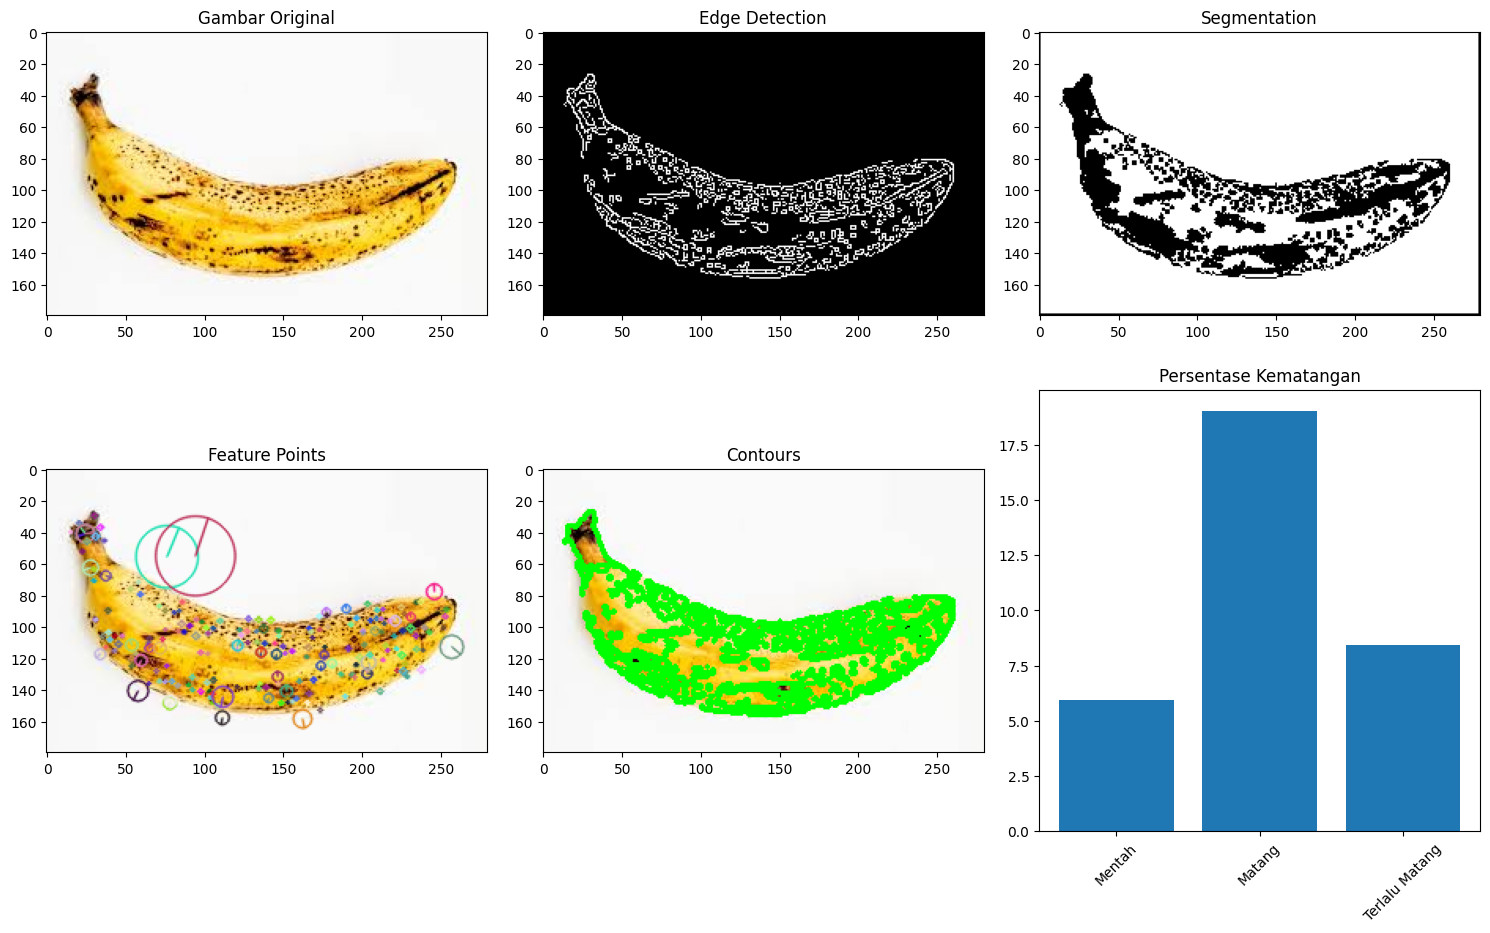

In [10]:
# Test the banana ripeness detector
detector = BananaRipenessDetector()

# Contoh penggunaan

# Gunakan ini jika ingin melakukan flexible input path
# image_path = input("Masukkan path gambar pisang yang ingin dianalisis: ")

image_source = "https://i.imgur.com/GhfRDaR.jpeg"

try:
    results = detector.detect_ripeness(image_source)
    print(f"Tingkat Kematangan: {results['ripeness']}")
    print("\nPersentase tiap kategori:")
    for category, percentage in results['percentages'].items():
        print(f"{category}: {percentage:.2f}%")
        
    detector.visualize_results(results)
    
except Exception as e:
    print(f"Error: {str(e)}")